In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Since the data was only avaiable in german we provide a translation table so that you can also understand what the original names were  

Translation table:  

# general translations
Bundesland = state

# features
#### general
Wahlkreis-Nr. = constituency number  
Wahlkreis-Name = constituency name 
Gemeinden am 31.12.2015 (Anzahl) = municipalities  
Fläche am 31.12.2015 (km^2) = area in km^2  

##### (The results table)  
Gebiet = area name  
gehört zu = belongs to  
Wahlberechtigte = eligible voters  
Wähler = voters  
Ungültige = invalid votes  
gültige = valid votes  


##### parties
Christlich Demokratische Union Deutschlands = cdu  
Sozialdemokratische Partei Deutschlands = spd  
Die Linke = linke  
BÜNDNIS 90/DIE GRÜNEN = green  
Freie Demokratische Partei = fdp  
Alternative für Deutschland = afd  

#### population  
Bevölkerung am 31.12.2015 - Insgesamt (in 1000) = population - total (in thousands)  
Bevölkerung am 31.12.2015 - Deutsche (in 1000) = population - germans (in thousands)  
Bevölkerung am 31.12.2015 - Ausländer (%) = population - foreigners (%)  
Bevölkerungsdichte am 31.12.2015 (Einwohner je km^2) = population density (inhabitants per km^2)  
Zu- (+) bzw. Abnahme (-) der Bevölkerung 2015 - Geburtensaldo (je 1000 Einwohner) = increase or decrease in population due to birth/death (per 1000 inhabitants)   
Zu- (+) bzw. Abnahme (-) der Bevölkerung 2015 - Wanderungssaldo (je 1000 Einwohner) =  increase or decrease in population due to migration (per 1000 inhabitants)

#### age
Alter von ... bis ... Jahren am 31.12.2015 - unter 18 (%) = aged under 18 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 18-24 (%) = aged 18 to 24 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 25-34 (%) = aged 25 to 34 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 35-59 (%) = aged 35 to 59 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 60-74 (%) = aged 60 to 74 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 75 und mehr (%) = aged 75 an older (%)  

### 2011 data
#### migration
Zensus 2011, Bevölkerung nach Migrationshintergrund am 09.05.2011 - ohne Migrationshintergrund (%) = inhibitants without a migration background (%)  
Zensus 2011, Bevölkerung nach Migrationshintergrund am 09.05.2011 - mit Migrationshintergrund (%) = inhibitants with a migration background (%)  

#### religion
Zensus 2011, Bevölkerung nach Religionszugehörigkeit am 09.05.2011 - Römisch-katholische Kirche (%) = religion - roman catholic (%)  
Zensus 2011, Bevölkerung nach Religionszugehörigkeit am 09.05.2011 - Evangelische Kirche (%) = religion - evangelical (%)  
Zensus 2011, Bevölkerung nach Religionszugehörigkeit am 09.05.2011 - Sonstige, keine, ohne Angabe (%) = religion - other, none, not specified (%)  

#### real estate
Zensus 2011, Wohnungen in Wohngebäuden am 09.05.2011 - Eigentümerquote = real estate ownership rate (%)
Bautätigkeit und Wohnungswesen - Fertiggestellte Wohnungen 2014 (je 1000 Einwohner) = completed apartments in 2014 (per 1000 inhbitants)
Bautätigkeit und Wohnungswesen - Bestand an Wohnungen am 31.12.2015 (je 1000 Einwohner) = Stock of apartments (per 1000 inhabitants)

#### income
Verfügbares Einkommen der privaten Haushalte 2014 (€ je Einwohner) = available income for private household € (per inhabitant)  
Bruttoinlandsprodukt 2014 (€ je Einwohner) = gdp per capita in €  

#### vehicles
Kraftfahrzeugbestand am 01.01.2016 (je 1000 Einwohner) = Motor vehicles (per 1000 inhabitants)  

#### education
Absolventen/Abgänger beruflicher Schulen 2015 = graduates of vocational schools  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - insgesamt ohne Externe (je 1000 Einwohner) = graduates of general schools (per 1000 inhabitants)  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - ohne Hauptschulabschluss (%) = graduates of general schools - without hauptschulabschluss (%)  
Absolventen/Abgïänger allgemeinbildender Schulen 2015 - mit Hauptschulabschluss (%) = graduates of general schools - with hauptschulabschluss (%)  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - mit mittlerem Schulabschluss (%) = graduates of general schools - with mittlerem Schulabschluss (%)  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - mit allgemeiner und Fachhochschulreife (%) = graduates of general schools - with allgemeiner and Fachhochschulereife (%)  

#### child care
Kindertagesbetreuung: Betreute Kinder am 01.03.2016 (je 1000 Einwohner) = children cared for (per 1000 inhabitants)  

#### economical
Unternehmensregister 2014 - Unternehmen insgesamt (je 1000 Einwohner) = companies registered (per 1000 inhabitants)  
Unternehmensregister 2014 - Handwerksunternehmen (je 1000 Einwohner) = handicraft companies registered (per 1000 inhabitants)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - insgesamt (je 1000 Einwohner) = employed and required to pay social secruity (per 1000 inhabitants)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - Land- und Forstwirtschaft, Fischerei (%) = employed and required to pay social secruity in - agriculture, forestry and fishing (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - Produzierendes Gewerbe (%) = employed and required to pay social secruity in - manufacturing (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - Handel, Gastgewerbe, Verkehr (%) = employed and required to pay social secruity in - trade, hospitality, transport (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - öffentliche und private Dienstleister (%) = employed and required to pay social secruity in - public and private service providers (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - übrige Dienstleister und 'ohne Angabe' (%) = employed and required to pay social secruity in - other service providers or not specified (%)  

#### unemployment
Empfänger(innen) von Leistungen nach SGB II am 31.12.2016 -  insgesamt (je 1000 Einwohner) = receivers of social spending (per 1000 inhabitants)  

Empfänger(innen) von Leistungen nach SGB II am 31.12.2016 - nicht erwerbsfähige Hilfebedürftige (%) = receivers of social spending - unable to work (%)  
Empfänger(innen) von Leistungen nach SGB II am 31.12.2016 - Ausländer (%) = receivers of social spending - foreigners (%)  
Arbeitslosenquote März 2017 - insgesamt = unemployment rate (%)  
Arbeitslosenquote März 2017 - Männer = unemployment rate - male (%)  
Arbeitslosenquote März 2017 - Frauen = unemployment rate - female (%)  
Arbeitslosenquote März 2017 - 15 bis unter 20 Jahre = unemployment rate - 15 to under 20 year olds (%)  
Arbeitslosenquote März 2017 - 55 bis unter 65 Jahre = unemployment rate - 55 to under 65 year olds (%)  

In [17]:
results = pd.read_csv("results_transformed.csv", sep=";")

In [18]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   constituency number  316 non-null    int64  
 1   area name            316 non-null    object 
 2   belongs to           315 non-null    float64
 3   eligible voters      316 non-null    int64  
 4   voters               316 non-null    int64  
 5   invalid votes        316 non-null    int64  
 6   valid votes          316 non-null    int64  
 7   cdu                  316 non-null    int64  
 8   spd                  316 non-null    int64  
 9   linke                316 non-null    int64  
 10  green                316 non-null    int64  
 11  fdp                  316 non-null    int64  
 12  afd                  316 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 32.2+ KB


In [14]:
feautures = pd.read_csv("features_transformed.csv", sep=";")

In [15]:
feautures.head()

,state,constituency number,municipalities,area in km^2,population - total (in thousands),population - germans (in thousands),population - foreigners (%),population density (inhabitants per km^2),increase or decrease in population due to birth/death (per 1000 inhabitants),increase or decrease in population due to migration (per 1000 inhabitants),...,employed and required to pay social secruity in - public and private service providers (%),employed and required to pay social secruity in - other service providers or not specified (%),receivers of social spending (per 1000 inhabitants),receivers of social spending - unable to work (%),receivers of social spending - foreigners (%),unemployment rate (%),unemployment rate - male (%),unemployment rate - female (%),unemployment rate - 15 to under 20 year olds (%),unemployment rate - 55 to under 65 year olds (%)
0,Schleswig-Holstein,1,130,"2128,1","282,8","266,7","5,7","132,9","-3,7","12,3",...,"16,4","35,2","88,5","26,3","18,8","7,2","8,2","6,2","4,2","7,3"
1,Schleswig-Holstein,2,197,2777,"232,3","219,7","5,4","83,6",-5,"13,2",...,"12,4","31,7","70,9","26,2","16,7","7,2","7,7","6,6","3,6","8,4"
2,Schleswig-Holstein,3,178,"2000,5","220,8","209,8",5,"110,4","-5,3","11,9",...,"15,9","30,3","80,1",26,"21,1","6,6","7,2",6,"5,2","6,6"
3,Schleswig-Holstein,4,163,"2164,8","248,7","239,4","3,7","114,9","-3,4",10,...,"15,5","34,7","59,4","28,1","23,8","5,1","5,5","4,7","3,2","5,6"
4,Schleswig-Holstein,5,3,143,268,"242,9","9,4","1873,8","-0,1","11,9",...,"25,2","38,6","138,7","26,4","28,3","8,8",10,"7,6","6,1","8,7"


In [16]:
results.head()

,nr,area name,belongs to,eligible voters,voters,invalid votes,valid votes,cdu,spd,linke,green,fdp,afd
0,1,Flensburg – Schleswig,1.0,228471,171914,1449,170465,58320,40388,14002,22304,18955,11653
1,2,Nordfriesland – Dithmarschen Nord,1.0,186568,139194,1123,138071,52928,31120,8589,15144,18050,9030
2,3,Steinburg – Dithmarschen Süd,1.0,176636,132017,1139,130878,47366,29756,8732,12960,17298,11180
3,4,Rendsburg-Eckernförde,1.0,200831,157354,1087,156267,56585,35766,9962,19337,19071,11578
4,5,Kiel,1.0,204650,153273,1204,152069,40736,36208,15546,26143,17804,10504


In [20]:
joined = results.join(feautures, on='constituency number', lsuffix='_caller', rsuffix='_other')
joined.head()

,constituency number_caller,area name,belongs to,eligible voters,voters,invalid votes,valid votes,cdu,spd,linke,...,employed and required to pay social secruity in - public and private service providers (%),employed and required to pay social secruity in - other service providers or not specified (%),receivers of social spending (per 1000 inhabitants),receivers of social spending - unable to work (%),receivers of social spending - foreigners (%),unemployment rate (%),unemployment rate - male (%),unemployment rate - female (%),unemployment rate - 15 to under 20 year olds (%),unemployment rate - 55 to under 65 year olds (%)
0,1,Flensburg – Schleswig,1.0,228471,171914,1449,170465,58320,40388,14002,...,"12,4","31,7","70,9","26,2","16,7","7,2","7,7","6,6","3,6","8,4"
1,2,Nordfriesland – Dithmarschen Nord,1.0,186568,139194,1123,138071,52928,31120,8589,...,"15,9","30,3","80,1",26,"21,1","6,6","7,2",6,"5,2","6,6"
2,3,Steinburg – Dithmarschen Süd,1.0,176636,132017,1139,130878,47366,29756,8732,...,"15,5","34,7","59,4","28,1","23,8","5,1","5,5","4,7","3,2","5,6"
3,4,Rendsburg-Eckernförde,1.0,200831,157354,1087,156267,56585,35766,9962,...,"25,2","38,6","138,7","26,4","28,3","8,8",10,"7,6","6,1","8,7"
4,5,Kiel,1.0,204650,153273,1204,152069,40736,36208,15546,...,"17,6","29,1","86,8","26,2","22,1","6,9","7,5","6,4","4,4","7,7"


In [28]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 63 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   constituency number_caller                                                                      316 non-null    int64  
 1   area name                                                                                       316 non-null    object 
 2   belongs to                                                                                      315 non-null    float64
 3   eligible voters                                                                                 316 non-null    int64  
 4   voters                                                                                          316 non-null    int64  
 5   invalid votes  

<AxesSubplot:>

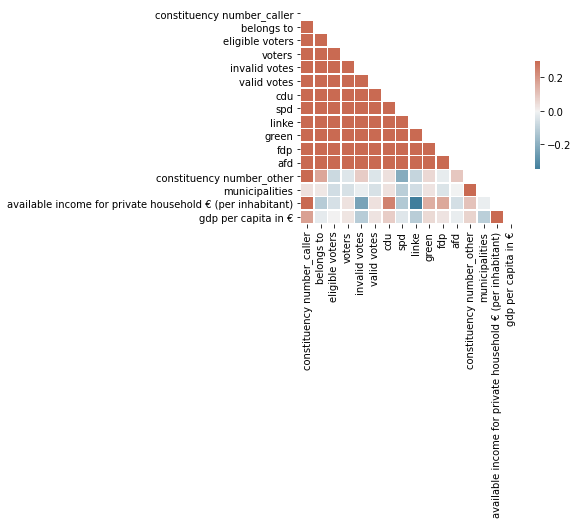

In [26]:
# Compute the correlation matrix
corr = joined.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
corr.shape

(16, 16)